In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
import math

In [2]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   
#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다.

In [5]:
korean = pd.read_csv("02-1_내국인유동인구_KOREAN.csv", encoding='cp949')

In [6]:
korean

,base_date,time,city,emd_cd,emd_nm,sex,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd
0,2018-01-01,1,제주시,50110250,한림읍,여성,0,638.5509,15.5400,151.5149,제주
1,2018-01-01,1,제주시,50110250,한림읍,여성,0,0.0000,3.7249,171.3458,그외
2,2018-01-01,1,제주시,50110250,한림읍,여성,10,668.4577,17.0308,166.0500,제주
3,2018-01-01,1,제주시,50110250,한림읍,여성,10,0.0000,4.2577,195.8539,그외
4,2018-01-01,1,제주시,50110250,한림읍,여성,20,609.7710,5.9490,148.7246,제주
...,...,...,...,...,...,...,...,...,...,...,...
47250191,2021-06-30,24,서귀포시,50130620,예래동,남성,20,0.0000,0.0000,599.1969,그외
47250192,2021-06-30,24,서귀포시,50130620,예래동,남성,20,187.5990,41.9998,75.5996,제주
47250193,2021-06-30,24,서귀포시,50130620,예래동,남성,10,121.8467,0.0000,4.5128,제주
47250194,2021-06-30,24,서귀포시,50130620,예래동,남성,80,122.2190,0.0000,4.5032,제주


In [7]:
korean['base_date'] = pd.to_datetime(korean['base_date'])

In [8]:
korean_1 = korean.groupby(['base_date', 'emd_nm', 'age'])['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt'].sum().reset_index()

<ipython-input-8-f46a3337fb80>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  korean_1 = korean.groupby(['base_date', 'emd_nm', 'age'])['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt'].sum().reset_index()


In [9]:
korean_1

,base_date,emd_nm,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
0,2018-01-01,건입동,0,16351.2905,713.8630,16214.6272
1,2018-01-01,건입동,10,18486.9641,814.5841,18564.0649
2,2018-01-01,건입동,20,15567.3243,3324.0660,24819.1271
3,2018-01-01,건입동,30,21464.1979,3076.2479,24662.7518
4,2018-01-01,건입동,40,28162.6876,4193.0287,33514.8307
...,...,...,...,...,...,...
494194,2021-06-30,효돈동,40,13048.2698,1201.3172,6634.0157
494195,2021-06-30,효돈동,50,15587.7237,1371.6294,7738.4695
494196,2021-06-30,효돈동,60,13604.6820,695.3218,5568.2805
494197,2021-06-30,효돈동,70,9921.4180,176.8777,2737.0372


In [10]:
korean1 = pd.get_dummies(korean_1, columns = ['age'])

In [11]:
korean1

,base_date,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,age_0,age_10,age_20,age_30,age_40,age_50,age_60,age_70,age_80
0,2018-01-01,건입동,16351.2905,713.8630,16214.6272,1,0,0,0,0,0,0,0,0
1,2018-01-01,건입동,18486.9641,814.5841,18564.0649,0,1,0,0,0,0,0,0,0
2,2018-01-01,건입동,15567.3243,3324.0660,24819.1271,0,0,1,0,0,0,0,0,0
3,2018-01-01,건입동,21464.1979,3076.2479,24662.7518,0,0,0,1,0,0,0,0,0
4,2018-01-01,건입동,28162.6876,4193.0287,33514.8307,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494194,2021-06-30,효돈동,13048.2698,1201.3172,6634.0157,0,0,0,0,1,0,0,0,0
494195,2021-06-30,효돈동,15587.7237,1371.6294,7738.4695,0,0,0,0,0,1,0,0,0
494196,2021-06-30,효돈동,13604.6820,695.3218,5568.2805,0,0,0,0,0,0,1,0,0
494197,2021-06-30,효돈동,9921.4180,176.8777,2737.0372,0,0,0,0,0,0,0,1,0


In [12]:
korean1['0_resd'] = korean1['age_0'] * korean1['resd_pop_cnt']
korean1['10_resd'] = korean1['age_10'] * korean1['resd_pop_cnt']
korean1['20_resd'] = korean1['age_20'] * korean1['resd_pop_cnt']
korean1['30_resd'] = korean1['age_30'] * korean1['resd_pop_cnt']
korean1['40_resd'] = korean1['age_40'] * korean1['resd_pop_cnt']
korean1['50_resd'] = korean1['age_50'] * korean1['resd_pop_cnt']
korean1['60_resd'] = korean1['age_60'] * korean1['resd_pop_cnt']
korean1['70_resd'] = korean1['age_70'] * korean1['resd_pop_cnt']
korean1['80_resd'] = korean1['age_80'] * korean1['resd_pop_cnt']

korean1['0_work'] = korean1['age_0'] * korean1['work_pop_cnt']
korean1['10_work'] = korean1['age_10'] * korean1['work_pop_cnt']
korean1['20_work'] = korean1['age_20'] * korean1['work_pop_cnt']
korean1['30_work'] = korean1['age_30'] * korean1['work_pop_cnt']
korean1['40_work'] = korean1['age_40'] * korean1['work_pop_cnt']
korean1['50_work'] = korean1['age_50'] * korean1['work_pop_cnt']
korean1['60_work'] = korean1['age_60'] * korean1['work_pop_cnt']
korean1['70_work'] = korean1['age_70'] * korean1['work_pop_cnt']
korean1['80_work'] = korean1['age_80'] * korean1['work_pop_cnt']

korean1['0_visit'] = korean1['age_0'] * korean1['visit_pop_cnt']
korean1['10_visit'] = korean1['age_10'] * korean1['visit_pop_cnt']
korean1['20_visit'] = korean1['age_20'] * korean1['visit_pop_cnt']
korean1['30_visit'] = korean1['age_30'] * korean1['visit_pop_cnt']
korean1['40_visit'] = korean1['age_40'] * korean1['visit_pop_cnt']
korean1['50_visit'] = korean1['age_50'] * korean1['visit_pop_cnt']
korean1['60_visit'] = korean1['age_60'] * korean1['visit_pop_cnt']
korean1['70_visit'] = korean1['age_70'] * korean1['visit_pop_cnt']
korean1['80_visit'] = korean1['age_80'] * korean1['visit_pop_cnt']

In [13]:
korean1['resd'] = korean1['0_resd'] + korean1['10_resd'] + korean1['20_resd'] + korean1['30_resd'] + korean1['40_resd'] + korean1['50_resd'] + korean1['60_resd'] + korean1['70_resd'] + korean1['80_resd'] + korean1['0_work'] + korean1['10_work'] + korean1['20_work'] + korean1['30_work'] + korean1['40_work'] + korean1['50_work'] + korean1['60_work'] + korean1['70_work'] + korean1['80_work'] + korean1['0_visit'] + korean1['10_visit'] + korean1['20_visit'] + korean1['30_visit'] + korean1['40_visit'] + korean1['50_visit'] + korean1['60_visit'] + korean1['70_visit'] + korean1['80_visit']

In [14]:
korean1 = korean1.drop(['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt', 'age_0', 'age_10', 'age_20', 'age_30', 'age_40', 'age_50', 'age_60', 'age_70', 'age_80', '0_resd', '10_resd', '20_resd', '30_resd', '40_resd', '50_resd', '60_resd', '70_resd', '80_resd', '0_work', '10_work', '20_work', '30_work', '40_work', '50_work', '60_work', '70_work', '80_work', '0_visit', '10_visit', '20_visit', '30_visit', '40_visit', '50_visit', '60_visit', '70_visit', '80_visit'], axis = 1)

In [15]:
korean1

,base_date,emd_nm,resd
0,2018-01-01,건입동,33279.7807
1,2018-01-01,건입동,37865.6131
2,2018-01-01,건입동,43710.5174
3,2018-01-01,건입동,49203.1976
4,2018-01-01,건입동,65870.5470
...,...,...,...
494194,2021-06-30,효돈동,20883.6027
494195,2021-06-30,효돈동,24697.8226
494196,2021-06-30,효돈동,19868.2843
494197,2021-06-30,효돈동,12835.3329


In [16]:
korean2 = korean1.groupby(['base_date', 'emd_nm']).sum().reset_index()

In [17]:
korean2

,base_date,emd_nm,resd
0,2018-01-01,건입동,3.710493e+05
1,2018-01-01,구좌읍,5.283621e+05
2,2018-01-01,남원읍,5.160217e+05
3,2018-01-01,노형동,1.667941e+06
4,2018-01-01,대륜동,4.933991e+05
...,...,...,...
54906,2021-06-30,표선면,4.208569e+05
54907,2021-06-30,한경면,2.820137e+05
54908,2021-06-30,한림읍,8.066293e+05
54909,2021-06-30,화북동,8.637016e+05


In [18]:
longterm_frgn = pd.read_csv("02-2_장기체류 외국인 유동인구_LONG_TERM_FRGN.csv", encoding='cp949')

In [19]:
longterm_frgn

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd
0,2018-01-01,1,CAN,제주시,50110250,한림읍,6.3381,0.0000,4.5802,제주
1,2018-01-01,1,CHN,제주시,50110250,한림읍,442.1091,0.0000,5.7051,제주
2,2018-01-01,1,CHN,제주시,50110250,한림읍,0.0000,7.8695,51.3461,그외
3,2018-01-01,1,DEU,제주시,50110250,한림읍,0.0000,0.0000,8.2099,그외
4,2018-01-01,1,ETC,제주시,50110250,한림읍,15.9184,0.0000,2.8758,제주
...,...,...,...,...,...,...,...,...,...,...
23837312,2021-06-30,24,THA,서귀포시,50130620,예래동,0.0000,0.0000,3.3558,제주
23837313,2021-06-30,24,TWN,서귀포시,50130620,예래동,0.0000,0.0000,12.2655,그외
23837314,2021-06-30,24,USA,서귀포시,50130620,예래동,22.0624,0.0000,0.0000,제주
23837315,2021-06-30,24,USA,서귀포시,50130620,예래동,0.0000,0.0000,26.4749,그외


In [20]:
longterm_frgn['base_date'] = pd.to_datetime(longterm_frgn['base_date'])

In [21]:
longtermfrgn = longterm_frgn.groupby(['base_date', 'emd_nm', 'nationality'])['resd_pop_cnt'].sum().reset_index()

In [22]:
longtermfrgn

,base_date,emd_nm,nationality,resd_pop_cnt
0,2018-01-01,건입동,CAN,0.0000
1,2018-01-01,건입동,CHN,1061.2064
2,2018-01-01,건입동,ETC,3.9559
3,2018-01-01,건입동,IDN,1205.5205
4,2018-01-01,건입동,JPN,500.3513
...,...,...,...,...
1077542,2021-06-30,효돈동,RUS,0.0000
1077543,2021-06-30,효돈동,THA,0.0000
1077544,2021-06-30,효돈동,USA,0.0000
1077545,2021-06-30,효돈동,UZB,0.0000


In [23]:
longtermfrgn1 = pd.get_dummies(longtermfrgn, columns = ['nationality'])

In [24]:
longtermfrgn1['AUS_cnt'] = longtermfrgn1['nationality_AUS'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['BGD_cnt'] = longtermfrgn1['nationality_BGD'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['CAN_cnt'] = longtermfrgn1['nationality_CAN'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['CHN_cnt'] = longtermfrgn1['nationality_CHN'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['DEU_cnt'] = longtermfrgn1['nationality_DEU'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['EGY_cnt'] = longtermfrgn1['nationality_EGY'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['ETC_cnt'] = longtermfrgn1['nationality_ETC'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['FRA_cnt'] = longtermfrgn1['nationality_FRA'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['GBR_cnt'] = longtermfrgn1['nationality_GBR'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['IDN_cnt'] = longtermfrgn1['nationality_IDN'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['IND_cnt'] = longtermfrgn1['nationality_IND'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['JPN_cnt'] = longtermfrgn1['nationality_JPN'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['KAZ_cnt'] = longtermfrgn1['nationality_KAZ'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['KGZ_cnt'] = longtermfrgn1['nationality_KGZ'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['KHM_cnt'] = longtermfrgn1['nationality_KHM'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['LKA_cnt'] = longtermfrgn1['nationality_LKA'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['MGL_cnt'] = longtermfrgn1['nationality_MGL'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['MMR_cnt'] = longtermfrgn1['nationality_MMR'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['MYS_cnt'] = longtermfrgn1['nationality_MYS'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['NGR_cnt'] = longtermfrgn1['nationality_NGR'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['NPL_cnt'] = longtermfrgn1['nationality_NPL'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['NZL_cnt'] = longtermfrgn1['nationality_NZL'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['PAK_cnt'] = longtermfrgn1['nationality_PAK'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['PHL_cnt'] = longtermfrgn1['nationality_PHL'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['RUS_cnt'] = longtermfrgn1['nationality_RUS'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['THA_cnt'] = longtermfrgn1['nationality_THA'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['TWN_cnt'] = longtermfrgn1['nationality_TWN'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['UKR_cnt'] = longtermfrgn1['nationality_UKR'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['USA_cnt'] = longtermfrgn1['nationality_USA'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['UZB_cnt'] = longtermfrgn1['nationality_UZB'] * longtermfrgn1['resd_pop_cnt']
longtermfrgn1['VNM_cnt'] = longtermfrgn1['nationality_VNM'] * longtermfrgn1['resd_pop_cnt']

In [25]:
longtermfrgn1['ETC_resd_pop_cnt'] = longtermfrgn1['TWN_cnt'] + longtermfrgn1['VNM_cnt'] + longtermfrgn1['AUS_cnt'] + longtermfrgn1['CAN_cnt'] + longtermfrgn1['CHN_cnt'] + longtermfrgn1['EGY_cnt'] + longtermfrgn1['ETC_cnt'] + longtermfrgn1['GBR_cnt'] + longtermfrgn1['IDN_cnt'] + longtermfrgn1['MGL_cnt'] + longtermfrgn1['MYS_cnt'] + longtermfrgn1['NGR_cnt'] + longtermfrgn1['NZL_cnt'] +  longtermfrgn1['PAK_cnt'] + longtermfrgn1['RUS_cnt'] + longtermfrgn1['THA_cnt'] + longtermfrgn1['USA_cnt']

In [26]:
longtermfrgn1 = longtermfrgn1[['base_date', 'emd_nm', 'BGD_cnt', 'DEU_cnt', 'FRA_cnt', 'KGZ_cnt', 'LKA_cnt', 'MMR_cnt', 'NPL_cnt', 'PHL_cnt', 'UKR_cnt', 'UZB_cnt', 'JPN_cnt', 'ETC_resd_pop_cnt']]

In [27]:
longtermfrgn1

,base_date,emd_nm,BGD_cnt,DEU_cnt,FRA_cnt,KGZ_cnt,LKA_cnt,MMR_cnt,NPL_cnt,PHL_cnt,UKR_cnt,UZB_cnt,JPN_cnt,ETC_resd_pop_cnt
0,2018-01-01,건입동,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000
1,2018-01-01,건입동,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,1061.2064
2,2018-01-01,건입동,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,3.9559
3,2018-01-01,건입동,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,1205.5205
4,2018-01-01,건입동,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500.3513,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077542,2021-06-30,효돈동,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000
1077543,2021-06-30,효돈동,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000
1077544,2021-06-30,효돈동,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000
1077545,2021-06-30,효돈동,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000


In [28]:
longtermfrgn2 = longtermfrgn1.groupby(['base_date', 'emd_nm']).sum().reset_index()

In [29]:
longtermfrgn2

,base_date,emd_nm,BGD_cnt,DEU_cnt,FRA_cnt,KGZ_cnt,LKA_cnt,MMR_cnt,NPL_cnt,PHL_cnt,UKR_cnt,UZB_cnt,JPN_cnt,ETC_resd_pop_cnt
0,2018-01-01,건입동,0.0000,0.0000,0.0000,0.0,165.7006,0.0000,216.9030,414.6476,0.0,0.0000,500.3513,3177.3688
1,2018-01-01,구좌읍,0.0000,0.0000,0.0000,0.0,663.9184,29.6784,960.4211,595.3276,0.0,26.2618,107.3181,3867.1207
2,2018-01-01,남원읍,0.0000,0.0000,0.0000,0.0,1848.6039,122.1746,771.4046,407.2711,0.0,0.0000,0.0000,2885.3072
3,2018-01-01,노형동,0.0000,0.0000,33.5742,0.0,102.8659,64.9682,346.6340,207.3237,0.0,17.4898,443.9517,42312.1420
4,2018-01-01,대륜동,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,146.5616,0.0,0.0000,115.7638,2564.3937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54906,2021-06-30,표선면,0.0000,0.0000,0.0000,0.0,466.4508,62.6232,278.5915,238.6032,0.0,105.3216,0.0000,2691.8820
54907,2021-06-30,한경면,0.0000,81.1699,0.0000,0.0,631.9656,28.7023,343.7938,102.7320,0.0,0.0000,41.9920,5082.6386
54908,2021-06-30,한림읍,23.1814,0.0000,29.9808,0.0,500.3061,506.2138,1541.1455,725.7525,0.0,0.0000,0.0000,19898.1067
54909,2021-06-30,화북동,0.0000,0.0000,19.9872,0.0,180.5616,148.7322,320.0844,583.2533,0.0,258.9156,503.9001,3885.7236


In [30]:
shortterm_frgn = pd.read_csv("02-3_단기체류 외국인 유동인구_SHORT_TERM_FRGN.csv", encoding='cp949')

In [31]:
shortterm_frgn

,base_date,time,nationality,city,emd_cd,emd_nm,visit_pop_cnt
0,2018-01-01,1,CHN,제주시,50110250,한림읍,66.3170
1,2018-01-01,1,ETC,제주시,50110250,한림읍,21.1308
2,2018-01-01,1,HKG,제주시,50110250,한림읍,3.6771
3,2018-01-01,1,JPN,제주시,50110250,한림읍,5.5962
4,2018-01-01,1,USA,제주시,50110250,한림읍,3.9078
...,...,...,...,...,...,...,...
6059039,2021-06-30,24,USA,서귀포시,50130610,중문동,9.2120
6059040,2021-06-30,24,CHN,서귀포시,50130610,중문동,0.6039
6059041,2021-06-30,24,ETC,서귀포시,50130610,중문동,11.5473
6059042,2021-06-30,24,CHN,서귀포시,50130620,예래동,0.2013


In [32]:
shortterm_frgn['base_date'] = pd.to_datetime(shortterm_frgn['base_date'])

In [33]:
shorttermfrgn = shortterm_frgn.groupby(['base_date', 'emd_nm', 'nationality'])['visit_pop_cnt'].sum().reset_index()

In [34]:
shorttermfrgn

,base_date,emd_nm,nationality,visit_pop_cnt
0,2018-01-01,건입동,CHN,1424.3743
1,2018-01-01,건입동,ETC,258.8518
2,2018-01-01,건입동,HKG,264.7481
3,2018-01-01,건입동,IDN,483.0000
4,2018-01-01,건입동,JPN,509.2529
...,...,...,...,...
344658,2021-06-30,한림읍,USA,21.1876
344659,2021-06-30,화북동,CHN,1.4091
344660,2021-06-30,화북동,HKG,0.0332
344661,2021-06-30,화북동,USA,42.3752


In [35]:
shorttermfrgn1 = pd.get_dummies(shorttermfrgn, columns = ['nationality'])

In [36]:
shorttermfrgn1['CHN_visit_pop_cnt'] = shorttermfrgn1['nationality_CHN'] * shorttermfrgn1['visit_pop_cnt']
shorttermfrgn1['ETC_visit_pop_cnt'] = shorttermfrgn1['nationality_ETC'] * shorttermfrgn1['visit_pop_cnt']
shorttermfrgn1['HKG_visit_pop_cnt'] = shorttermfrgn1['nationality_HKG'] * shorttermfrgn1['visit_pop_cnt']
shorttermfrgn1['IDN_visit_pop_cnt'] = shorttermfrgn1['nationality_IDN'] * shorttermfrgn1['visit_pop_cnt']
shorttermfrgn1['JPN_visit_pop_cnt'] = shorttermfrgn1['nationality_JPN'] * shorttermfrgn1['visit_pop_cnt']
shorttermfrgn1['MYS_visit_pop_cnt'] = shorttermfrgn1['nationality_MYS'] * shorttermfrgn1['visit_pop_cnt']
shorttermfrgn1['SGP_visit_pop_cnt'] = shorttermfrgn1['nationality_SGP'] * shorttermfrgn1['visit_pop_cnt']
shorttermfrgn1['THA_visit_pop_cnt'] = shorttermfrgn1['nationality_THA'] * shorttermfrgn1['visit_pop_cnt']
shorttermfrgn1['USA_visit_pop_cnt'] = shorttermfrgn1['nationality_USA'] * shorttermfrgn1['visit_pop_cnt']
shorttermfrgn1['VNM_visit_pop_cnt'] = shorttermfrgn1['nationality_VNM'] * shorttermfrgn1['visit_pop_cnt']

In [37]:
shorttermfrgn1['ETC_visit_pop_cnt']=shorttermfrgn1['CHN_visit_pop_cnt'] + shorttermfrgn1['ETC_visit_pop_cnt'] + shorttermfrgn1['HKG_visit_pop_cnt'] + shorttermfrgn1['IDN_visit_pop_cnt'] + shorttermfrgn1['JPN_visit_pop_cnt'] + shorttermfrgn1['MYS_visit_pop_cnt'] + shorttermfrgn1['SGP_visit_pop_cnt'] + shorttermfrgn1['VNM_visit_pop_cnt']

In [38]:
shorttermfrgn1 = shorttermfrgn1[['base_date', 'emd_nm', 'ETC_visit_pop_cnt', 'THA_visit_pop_cnt', 'USA_visit_pop_cnt']]

In [39]:
shorttermfrgn1

,base_date,emd_nm,ETC_visit_pop_cnt,THA_visit_pop_cnt,USA_visit_pop_cnt
0,2018-01-01,건입동,1424.3743,0.0,0.0000
1,2018-01-01,건입동,258.8518,0.0,0.0000
2,2018-01-01,건입동,264.7481,0.0,0.0000
3,2018-01-01,건입동,483.0000,0.0,0.0000
4,2018-01-01,건입동,509.2529,0.0,0.0000
...,...,...,...,...,...
344658,2021-06-30,한림읍,0.0000,0.0,21.1876
344659,2021-06-30,화북동,1.4091,0.0,0.0000
344660,2021-06-30,화북동,0.0332,0.0,0.0000
344661,2021-06-30,화북동,0.0000,0.0,42.3752


In [40]:
shorttermfrgn2 = shorttermfrgn1.groupby(['base_date', 'emd_nm']).sum().reset_index()

In [41]:
shorttermfrgn2

,base_date,emd_nm,ETC_visit_pop_cnt,THA_visit_pop_cnt,USA_visit_pop_cnt
0,2018-01-01,건입동,4751.7521,23.4566,1.9539
1,2018-01-01,구좌읍,1487.6542,832.7089,46.8936
2,2018-01-01,남원읍,3466.3551,0.0000,85.9717
3,2018-01-01,노형동,9503.5558,70.3697,80.1103
4,2018-01-01,대륜동,1341.1864,0.0000,5.8617
...,...,...,...,...,...
53711,2021-06-30,표선면,86.6566,0.4400,2.7636
53712,2021-06-30,한경면,6.9285,0.0352,5.5272
53713,2021-06-30,한림읍,51.5825,0.1584,21.1876
53714,2021-06-30,화북동,1.4423,0.0000,42.3752


In [42]:
cardspending = pd.read_csv("04_음식관련 카드소비_CARD_SPENDING.csv", encoding='cp949')

In [43]:
cardspending

,base_date,city,emd_cd,emd_nm,mct_cat_cd,mct_cat_nm,use_cnt,use_amt
0,2018-01-06,제주시,50110650,연동,C00100,한식,3643,127777300
1,2018-01-09,제주시,50110650,연동,C00500,패스트푸드,432,6711675
2,2018-01-15,제주시,50110650,연동,C01200,농축수산물,236,16089579
3,2018-01-15,제주시,50110650,연동,A00200,마트/슈퍼마켓,4031,121979867
4,2018-01-20,제주시,50110650,연동,C01000,식품,633,30410674
...,...,...,...,...,...,...,...,...
544800,2020-10-16,제주시,XXXXXXXX,알수없음,C01400,배달,5,127250
544801,2019-08-31,서귀포시,XXXXXXXX,알수없음,C01400,배달,5,39974
544802,2020-10-03,서귀포시,XXXXXXXX,알수없음,C01400,배달,10,329832
544803,2020-10-23,서귀포시,XXXXXXXX,알수없음,C01400,배달,5,68715


In [44]:
cardspending['base_date'] = pd.to_datetime(cardspending['base_date'])

In [45]:
cardspending_1 = cardspending.groupby(['base_date', 'emd_nm', 'mct_cat_nm'])['use_cnt'].sum().reset_index()

In [46]:
cardspending_1

,base_date,emd_nm,mct_cat_nm,use_cnt
0,2018-01-01,건입동,간식,79
1,2018-01-01,건입동,농축수산물,34
2,2018-01-01,건입동,마트/슈퍼마켓,589
3,2018-01-01,건입동,배달,5
4,2018-01-01,건입동,식품,152
...,...,...,...,...
539726,2021-06-30,효돈동,식품,151
539727,2021-06-30,효돈동,아시아음식,25
539728,2021-06-30,효돈동,양식,5
539729,2021-06-30,효돈동,패스트푸드,30


In [47]:
cardspending1 = pd.get_dummies(cardspending_1, columns = ['mct_cat_nm'])

In [48]:
cardspending1['간식_cnt'] = cardspending1['mct_cat_nm_간식'] * cardspending1['use_cnt']
cardspending1['농축수산물_cnt'] = cardspending1['mct_cat_nm_농축수산물'] * cardspending1['use_cnt']
cardspending1['마트/슈퍼마켓_cnt'] = cardspending1['mct_cat_nm_마트/슈퍼마켓'] * cardspending1['use_cnt']
cardspending1['배달_cnt'] = cardspending1['mct_cat_nm_배달'] * cardspending1['use_cnt']
cardspending1['식품_cnt'] = cardspending1['mct_cat_nm_식품'] * cardspending1['use_cnt']
cardspending1['아시아음식_cnt'] = cardspending1['mct_cat_nm_아시아음식'] * cardspending1['use_cnt']
cardspending1['양식_cnt'] = cardspending1['mct_cat_nm_양식'] * cardspending1['use_cnt']
cardspending1['주점및주류판매_cnt'] = cardspending1['mct_cat_nm_주점및주류판매'] * cardspending1['use_cnt']
cardspending1['패스트푸드_cnt'] = cardspending1['mct_cat_nm_패스트푸드'] * cardspending1['use_cnt']
cardspending1['한식_cnt'] = cardspending1['mct_cat_nm_한식'] * cardspending1['use_cnt']
cardspending1['부페_cnt'] = cardspending1['mct_cat_nm_부페'] * cardspending1['use_cnt']

In [49]:
cardspending1 = cardspending1[['base_date', 'emd_nm', '배달_cnt']]

In [50]:
cardspending1

,base_date,emd_nm,배달_cnt
0,2018-01-01,건입동,0
1,2018-01-01,건입동,0
2,2018-01-01,건입동,0
3,2018-01-01,건입동,5
4,2018-01-01,건입동,0
...,...,...,...
539726,2021-06-30,효돈동,0
539727,2021-06-30,효돈동,0
539728,2021-06-30,효돈동,0
539729,2021-06-30,효돈동,0


In [51]:
cardspending2 = cardspending1.groupby(['base_date', 'emd_nm']).sum().reset_index()

In [52]:
cardspending2

,base_date,emd_nm,배달_cnt
0,2018-01-01,건입동,5
1,2018-01-01,구좌읍,5
2,2018-01-01,남원읍,25
3,2018-01-01,노형동,123
4,2018-01-01,대륜동,20
...,...,...,...
56183,2021-06-30,표선면,75
56184,2021-06-30,한경면,40
56185,2021-06-30,한림읍,257
56186,2021-06-30,화북동,644


In [53]:
merge = pd.merge(longtermfrgn2, shorttermfrgn2, how = 'inner')

In [54]:
merge = pd.merge(merge, cardspending2, how = 'inner')

In [55]:
merge = pd.merge(merge, korean2, how = 'inner')

In [56]:
merge

,base_date,emd_nm,BGD_cnt,DEU_cnt,FRA_cnt,KGZ_cnt,LKA_cnt,MMR_cnt,NPL_cnt,PHL_cnt,UKR_cnt,UZB_cnt,JPN_cnt,ETC_resd_pop_cnt,ETC_visit_pop_cnt,THA_visit_pop_cnt,USA_visit_pop_cnt,배달_cnt,resd
0,2018-01-01,건입동,0.0000,0.0000,0.0000,0.0,165.7006,0.0000,216.9030,414.6476,0.0,0.0000,500.3513,3177.3688,4751.7521,23.4566,1.9539,5,3.710493e+05
1,2018-01-01,구좌읍,0.0000,0.0000,0.0000,0.0,663.9184,29.6784,960.4211,595.3276,0.0,26.2618,107.3181,3867.1207,1487.6542,832.7089,46.8936,5,5.283621e+05
2,2018-01-01,남원읍,0.0000,0.0000,0.0000,0.0,1848.6039,122.1746,771.4046,407.2711,0.0,0.0000,0.0000,2885.3072,3466.3551,0.0000,85.9717,25,5.160217e+05
3,2018-01-01,노형동,0.0000,0.0000,33.5742,0.0,102.8659,64.9682,346.6340,207.3237,0.0,17.4898,443.9517,42312.1420,9503.5558,70.3697,80.1103,123,1.667941e+06
4,2018-01-01,대륜동,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,146.5616,0.0,0.0000,115.7638,2564.3937,1341.1864,0.0000,5.8617,20,4.933991e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53711,2021-06-30,표선면,0.0000,0.0000,0.0000,0.0,466.4508,62.6232,278.5915,238.6032,0.0,105.3216,0.0000,2691.8820,86.6566,0.4400,2.7636,75,4.208569e+05
53712,2021-06-30,한경면,0.0000,81.1699,0.0000,0.0,631.9656,28.7023,343.7938,102.7320,0.0,0.0000,41.9920,5082.6386,6.9285,0.0352,5.5272,40,2.820137e+05
53713,2021-06-30,한림읍,23.1814,0.0000,29.9808,0.0,500.3061,506.2138,1541.1455,725.7525,0.0,0.0000,0.0000,19898.1067,51.5825,0.1584,21.1876,257,8.066293e+05
53714,2021-06-30,화북동,0.0000,0.0000,19.9872,0.0,180.5616,148.7322,320.0844,583.2533,0.0,258.9156,503.9001,3885.7236,1.4423,0.0000,42.3752,644,8.637016e+05


In [57]:
merge['resd'] = merge['JPN_cnt'] + merge['ETC_resd_pop_cnt'] + merge['resd']

In [58]:
merge2 = merge.drop(['JPN_cnt', 'ETC_resd_pop_cnt'], axis = 1)

In [59]:
merge2

,base_date,emd_nm,BGD_cnt,DEU_cnt,FRA_cnt,KGZ_cnt,LKA_cnt,MMR_cnt,NPL_cnt,PHL_cnt,UKR_cnt,UZB_cnt,ETC_visit_pop_cnt,THA_visit_pop_cnt,USA_visit_pop_cnt,배달_cnt,resd
0,2018-01-01,건입동,0.0000,0.0000,0.0000,0.0,165.7006,0.0000,216.9030,414.6476,0.0,0.0000,4751.7521,23.4566,1.9539,5,3.747270e+05
1,2018-01-01,구좌읍,0.0000,0.0000,0.0000,0.0,663.9184,29.6784,960.4211,595.3276,0.0,26.2618,1487.6542,832.7089,46.8936,5,5.323365e+05
2,2018-01-01,남원읍,0.0000,0.0000,0.0000,0.0,1848.6039,122.1746,771.4046,407.2711,0.0,0.0000,3466.3551,0.0000,85.9717,25,5.189070e+05
3,2018-01-01,노형동,0.0000,0.0000,33.5742,0.0,102.8659,64.9682,346.6340,207.3237,0.0,17.4898,9503.5558,70.3697,80.1103,123,1.710697e+06
4,2018-01-01,대륜동,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,146.5616,0.0,0.0000,1341.1864,0.0000,5.8617,20,4.960792e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53711,2021-06-30,표선면,0.0000,0.0000,0.0000,0.0,466.4508,62.6232,278.5915,238.6032,0.0,105.3216,86.6566,0.4400,2.7636,75,4.235488e+05
53712,2021-06-30,한경면,0.0000,81.1699,0.0000,0.0,631.9656,28.7023,343.7938,102.7320,0.0,0.0000,6.9285,0.0352,5.5272,40,2.871384e+05
53713,2021-06-30,한림읍,23.1814,0.0000,29.9808,0.0,500.3061,506.2138,1541.1455,725.7525,0.0,0.0000,51.5825,0.1584,21.1876,257,8.265274e+05
53714,2021-06-30,화북동,0.0000,0.0000,19.9872,0.0,180.5616,148.7322,320.0844,583.2533,0.0,258.9156,1.4423,0.0000,42.3752,644,8.680912e+05


In [60]:
train = merge2[merge2['base_date'] <= '2020-12-31']

In [61]:
test = merge2[merge2['base_date'] > '2020-12-31']

In [62]:
한림읍_train = train[train['emd_nm']=='한림읍']
애월읍_train = train[train['emd_nm']=='애월읍']
구좌읍_train = train[train['emd_nm']=='구좌읍']
조천읍_train = train[train['emd_nm']=='조천읍']
한경면_train = train[train['emd_nm']=='한경면']
일도1동_train = train[train['emd_nm']=='일도1동']
일도2동_train = train[train['emd_nm']=='일도2동']
이도1동_train = train[train['emd_nm']=='이도1동']
이도2동_train = train[train['emd_nm']=='이도2동']
삼도1동_train = train[train['emd_nm']=='삼도1동']
삼도2동_train = train[train['emd_nm']=='삼도2동']
용담1동_train = train[train['emd_nm']=='용담1동']
용담2동_train = train[train['emd_nm']=='용담2동']
건입동_train = train[train['emd_nm']=='건입동']
화북동_train = train[train['emd_nm']=='화북동']
삼양동_train = train[train['emd_nm']=='삼양동']
봉개동_train = train[train['emd_nm']=='봉개동']
아라동_train = train[train['emd_nm']=='아라동']
오라동_train = train[train['emd_nm']=='오라동']
연동_train = train[train['emd_nm']=='연동']
노형동_train = train[train['emd_nm']=='노형동']
외도동_train = train[train['emd_nm']=='외도동']
이호동_train = train[train['emd_nm']=='이호동']
도두동_train = train[train['emd_nm']=='도두동']
대정읍_train = train[train['emd_nm']=='대정읍']
남원읍_train = train[train['emd_nm']=='남원읍']
성산읍_train = train[train['emd_nm']=='성산읍']
안덕면_train = train[train['emd_nm']=='안덕면']
표선면_train = train[train['emd_nm']=='표선면']
송산동_train = train[train['emd_nm']=='송산동']
정방동_train = train[train['emd_nm']=='정방동']
중앙동_train = train[train['emd_nm']=='중앙동']
천지동_train = train[train['emd_nm']=='천지동']
효돈동_train = train[train['emd_nm']=='효돈동']
영천동_train = train[train['emd_nm']=='영천동']
동홍동_train = train[train['emd_nm']=='동홍동']
서홍동_train = train[train['emd_nm']=='서홍동']
대륜동_train = train[train['emd_nm']=='대륜동']
대천동_train = train[train['emd_nm']=='대천동']
중문동_train = train[train['emd_nm']=='중문동']
예래동_train = train[train['emd_nm']=='예래동']
알수없음_train = train[train['emd_nm']=='알수없음']

In [63]:
한림읍_test = test[test['emd_nm']=='한림읍']
애월읍_test = test[test['emd_nm']=='애월읍']
구좌읍_test = test[test['emd_nm']=='구좌읍']
조천읍_test = test[test['emd_nm']=='조천읍']
한경면_test = test[test['emd_nm']=='한경면']
일도1동_test = test[test['emd_nm']=='일도1동']
일도2동_test = test[test['emd_nm']=='일도2동']
이도1동_test = test[test['emd_nm']=='이도1동']
이도2동_test = test[test['emd_nm']=='이도2동']
삼도1동_test = test[test['emd_nm']=='삼도1동']
삼도2동_test = test[test['emd_nm']=='삼도2동']
용담1동_test = test[test['emd_nm']=='용담1동']
용담2동_test = test[test['emd_nm']=='용담2동']
건입동_test = test[test['emd_nm']=='건입동']
화북동_test = test[test['emd_nm']=='화북동']
삼양동_test = test[test['emd_nm']=='삼양동']
봉개동_test = test[test['emd_nm']=='봉개동']
아라동_test = test[test['emd_nm']=='아라동']
오라동_test = test[test['emd_nm']=='오라동']
연동_test = test[test['emd_nm']=='연동']
노형동_test = test[test['emd_nm']=='노형동']
외도동_test = test[test['emd_nm']=='외도동']
이호동_test = test[test['emd_nm']=='이호동']
도두동_test = test[test['emd_nm']=='도두동']
대정읍_test = test[test['emd_nm']=='대정읍']
남원읍_test = test[test['emd_nm']=='남원읍']
성산읍_test = test[test['emd_nm']=='성산읍']
안덕면_test = test[test['emd_nm']=='안덕면']
표선면_test = test[test['emd_nm']=='표선면']
송산동_test = test[test['emd_nm']=='송산동']
정방동_test = test[test['emd_nm']=='정방동']
중앙동_test = test[test['emd_nm']=='중앙동']
천지동_test = test[test['emd_nm']=='천지동']
효돈동_test = test[test['emd_nm']=='효돈동']
영천동_test = test[test['emd_nm']=='영천동']
동홍동_test = test[test['emd_nm']=='동홍동']
서홍동_test = test[test['emd_nm']=='서홍동']
대륜동_test = test[test['emd_nm']=='대륜동']
대천동_test = test[test['emd_nm']=='대천동']
중문동_test = test[test['emd_nm']=='중문동']
예래동_test = test[test['emd_nm']=='예래동']
알수없음_test = test[test['emd_nm']=='알수없음']

In [64]:
train_한림읍_inf = 한림읍_train.iloc[:, 2:].values
test_한림읍_inf = 한림읍_test.iloc[:, 2:].values

train_애월읍_inf = 애월읍_train.iloc[:, 2:].values
test_애월읍_inf = 애월읍_test.iloc[:, 2:].values

train_구좌읍_inf = 구좌읍_train.iloc[:, 2:].values
test_구좌읍_inf = 구좌읍_test.iloc[:, 2:].values

train_조천읍_inf = 조천읍_train.iloc[:, 2:].values
test_조천읍_inf = 조천읍_test.iloc[:, 2:].values

train_한경면_inf = 한경면_train.iloc[:, 2:].values
test_한경면_inf = 한경면_test.iloc[:, 2:].values

train_일도1동_inf = 일도1동_train.iloc[:, 2:].values
test_일도1동_inf = 일도1동_test.iloc[:, 2:].values

train_일도2동_inf = 일도2동_train.iloc[:, 2:].values
test_일도2동_inf = 일도2동_test.iloc[:, 2:].values

train_이도1동_inf = 이도1동_train.iloc[:, 2:].values
test_이도1동_inf = 이도1동_test.iloc[:, 2:].values

train_이도2동_inf = 이도2동_train.iloc[:, 2:].values
test_이도2동_inf = 이도2동_test.iloc[:, 2:].values

train_삼도1동_inf = 삼도1동_train.iloc[:, 2:].values
test_삼도1동_inf = 삼도1동_test.iloc[:, 2:].values

train_삼도2동_inf = 삼도2동_train.iloc[:, 2:].values
test_삼도2동_inf = 삼도2동_test.iloc[:, 2:].values

train_용담1동_inf = 용담1동_train.iloc[:, 2:].values
test_용담1동_inf = 용담1동_test.iloc[:, 2:].values

train_용담2동_inf = 용담2동_train.iloc[:, 2:].values
test_용담2동_inf = 용담2동_test.iloc[:, 2:].values

train_건입동_inf = 건입동_train.iloc[:, 2:].values
test_건입동_inf = 건입동_test.iloc[:, 2:].values

train_화북동_inf = 화북동_train.iloc[:, 2:].values
test_화북동_inf = 화북동_test.iloc[:, 2:].values

train_삼양동_inf = 삼양동_train.iloc[:, 2:].values
test_삼양동_inf = 삼양동_test.iloc[:, 2:].values

train_봉개동_inf = 봉개동_train.iloc[:, 2:].values
test_봉개동_inf = 봉개동_test.iloc[:, 2:].values

train_아라동_inf = 아라동_train.iloc[:, 2:].values
test_아라동_inf = 아라동_test.iloc[:, 2:].values

train_오라동_inf = 오라동_train.iloc[:, 2:].values
test_오라동_inf = 오라동_test.iloc[:, 2:].values

train_연동_inf = 연동_train.iloc[:, 2:].values
test_연동_inf = 연동_test.iloc[:, 2:].values

train_노형동_inf = 노형동_train.iloc[:, 2:].values
test_노형동_inf = 노형동_test.iloc[:, 2:].values

train_외도동_inf = 외도동_train.iloc[:, 2:].values
test_외도동_inf = 외도동_test.iloc[:, 2:].values

train_이호동_inf = 이호동_train.iloc[:, 2:].values
test_이호동_inf = 이호동_test.iloc[:, 2:].values

train_도두동_inf = 도두동_train.iloc[:, 2:].values
test_도두동_inf = 도두동_test.iloc[:, 2:].values

train_대정읍_inf = 대정읍_train.iloc[:, 2:].values
test_대정읍_inf = 대정읍_test.iloc[:, 2:].values

train_남원읍_inf = 남원읍_train.iloc[:, 2:].values
test_남원읍_inf = 남원읍_test.iloc[:, 2:].values

train_성산읍_inf = 성산읍_train.iloc[:, 2:].values
test_성산읍_inf = 성산읍_test.iloc[:, 2:].values

train_안덕면_inf = 안덕면_train.iloc[:, 2:].values
test_안덕면_inf = 안덕면_test.iloc[:, 2:].values

train_표선면_inf = 표선면_train.iloc[:, 2:].values
test_표선면_inf = 표선면_test.iloc[:, 2:].values

train_송산동_inf = 송산동_train.iloc[:, 2:].values
test_송산동_inf = 송산동_test.iloc[:, 2:].values

train_정방동_inf = 정방동_train.iloc[:, 2:].values
test_정방동_inf = 정방동_test.iloc[:, 2:].values

train_중앙동_inf = 중앙동_train.iloc[:, 2:].values
test_중앙동_inf = 중앙동_test.iloc[:, 2:].values

train_천지동_inf = 천지동_train.iloc[:, 2:].values
test_천지동_inf = 천지동_test.iloc[:, 2:].values

train_효돈동_inf = 효돈동_train.iloc[:, 2:].values
test_효돈동_inf = 효돈동_test.iloc[:, 2:].values

train_영천동_inf = 영천동_train.iloc[:, 2:].values
test_영천동_inf = 영천동_test.iloc[:, 2:].values

train_동홍동_inf = 동홍동_train.iloc[:, 2:].values
test_동홍동_inf = 동홍동_test.iloc[:, 2:].values

train_서홍동_inf = 서홍동_train.iloc[:, 2:].values
test_서홍동_inf = 서홍동_test.iloc[:, 2:].values

train_대륜동_inf = 대륜동_train.iloc[:, 2:].values
test_대륜동_inf = 대륜동_test.iloc[:, 2:].values

train_대천동_inf = 대천동_train.iloc[:, 2:].values
test_대천동_inf = 대천동_test.iloc[:, 2:].values

train_중문동_inf = 중문동_train.iloc[:, 2:].values
test_중문동_inf = 중문동_test.iloc[:, 2:].values

train_예래동_inf = 예래동_train.iloc[:, 2:].values
test_예래동_inf = 예래동_test.iloc[:, 2:].values

train_알수없음_inf = 알수없음_train.iloc[:, 2:].values
test_알수없음_inf = 알수없음_test.iloc[:, 2:].values

In [65]:
한림읍_train

,base_date,emd_nm,BGD_cnt,DEU_cnt,FRA_cnt,KGZ_cnt,LKA_cnt,MMR_cnt,NPL_cnt,PHL_cnt,UKR_cnt,UZB_cnt,ETC_visit_pop_cnt,THA_visit_pop_cnt,USA_visit_pop_cnt,배달_cnt,resd
40,2018-01-01,한림읍,0.0,0.0,0.0000,168.0889,2362.3576,35.6302,2112.4613,1244.0643,0.0,148.3014,2146.9338,0.0000,29.3085,15,654077.7250
83,2018-01-02,한림읍,0.0,0.0,0.0000,145.5502,2355.3949,206.2922,1835.3075,1476.7257,0.0,183.3387,1803.0437,0.0000,13.6773,29,657970.7297
126,2018-01-03,한림읍,0.0,0.0,0.0000,147.0887,2137.2769,189.2177,2301.3732,1583.1022,0.0,207.1399,1900.5158,0.0000,3.9078,15,675378.6385
169,2018-01-04,한림읍,0.0,0.0,0.0000,155.6837,2044.7291,87.6342,2184.9044,1442.4428,0.0,196.8836,1190.1574,35.1849,5.8617,20,685543.6580
212,2018-01-05,한림읍,0.0,0.0,0.0000,166.7894,1922.9773,100.2011,2278.8237,1409.8310,0.0,181.0924,1167.0322,0.0000,0.0000,39,670204.2308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46345,2020-12-27,한림읍,0.0,0.0,86.6304,0.0000,903.4411,377.5410,1720.2358,799.8920,0.0,0.0000,40.0077,0.0000,0.0000,208,699364.7215
46386,2020-12-28,한림읍,0.0,0.0,86.6304,0.0000,951.9192,307.1520,1748.0712,857.3000,0.0,0.0000,45.1795,0.5784,0.0000,142,714811.2146
46426,2020-12-29,한림읍,0.0,0.0,86.6304,0.0000,1057.6872,374.3415,1761.9886,887.9176,0.0,0.0000,35.8468,0.0000,3.9075,178,744546.8526
46466,2020-12-30,한림읍,0.0,0.0,86.6304,0.0000,943.1050,383.9400,1664.5649,861.1272,0.0,0.0000,32.1746,0.0000,0.0000,173,736484.8473


In [66]:
한림읍_test

,base_date,emd_nm,BGD_cnt,DEU_cnt,FRA_cnt,KGZ_cnt,LKA_cnt,MMR_cnt,NPL_cnt,PHL_cnt,UKR_cnt,UZB_cnt,ETC_visit_pop_cnt,THA_visit_pop_cnt,USA_visit_pop_cnt,배달_cnt,resd
46548,2021-01-01,한림읍,0.0000,0.0,82.9776,0.0,967.5528,363.1992,2282.9820,851.6575,0.0,0.0,11.4409,0.0000,3.6210,268,737367.9361
46586,2021-01-02,한림읍,0.0000,0.0,82.9776,0.0,980.2836,348.0656,2296.3328,883.0551,0.0,0.0,8.4138,0.0979,15.6910,162,710629.6151
46626,2021-01-03,한림읍,0.0000,0.0,82.9776,0.0,954.8216,363.1992,2252.9427,753.5400,0.0,0.0,11.7118,0.1602,15.0875,243,687917.0593
46666,2021-01-04,한림읍,0.0000,0.0,76.0628,0.0,920.8726,359.4158,2226.2411,1004.7208,0.0,0.0,9.8299,0.0000,14.4840,162,688033.4659
46705,2021-01-05,한림읍,0.0000,0.0,82.9776,0.0,1039.6950,363.1992,2319.6967,1028.2690,0.0,0.0,23.7894,0.0000,15.6910,182,708008.6498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53553,2021-06-26,한림읍,50.5776,0.0,76.6176,0.0,601.8720,587.1035,1375.1756,742.3225,0.0,0.0,34.3069,0.0000,0.9212,322,830113.1061
53593,2021-06-27,한림읍,18.9666,0.0,79.9488,0.0,526.6380,607.9782,1330.7198,752.2640,0.0,0.0,36.5075,0.0000,0.0000,262,817654.7197
53631,2021-06-28,한림읍,27.3962,0.0,76.6176,0.0,447.6423,602.7595,1555.9637,821.8563,0.0,0.0,48.3068,0.0000,9.2120,186,839066.7316
53670,2021-06-29,한림읍,29.5036,0.0,69.9552,0.0,496.5444,568.8378,1523.3626,798.6593,0.0,0.0,39.4341,0.0000,25.7936,246,847359.2747


In [67]:
train_한림읍_inf.shape

(1096, 15)

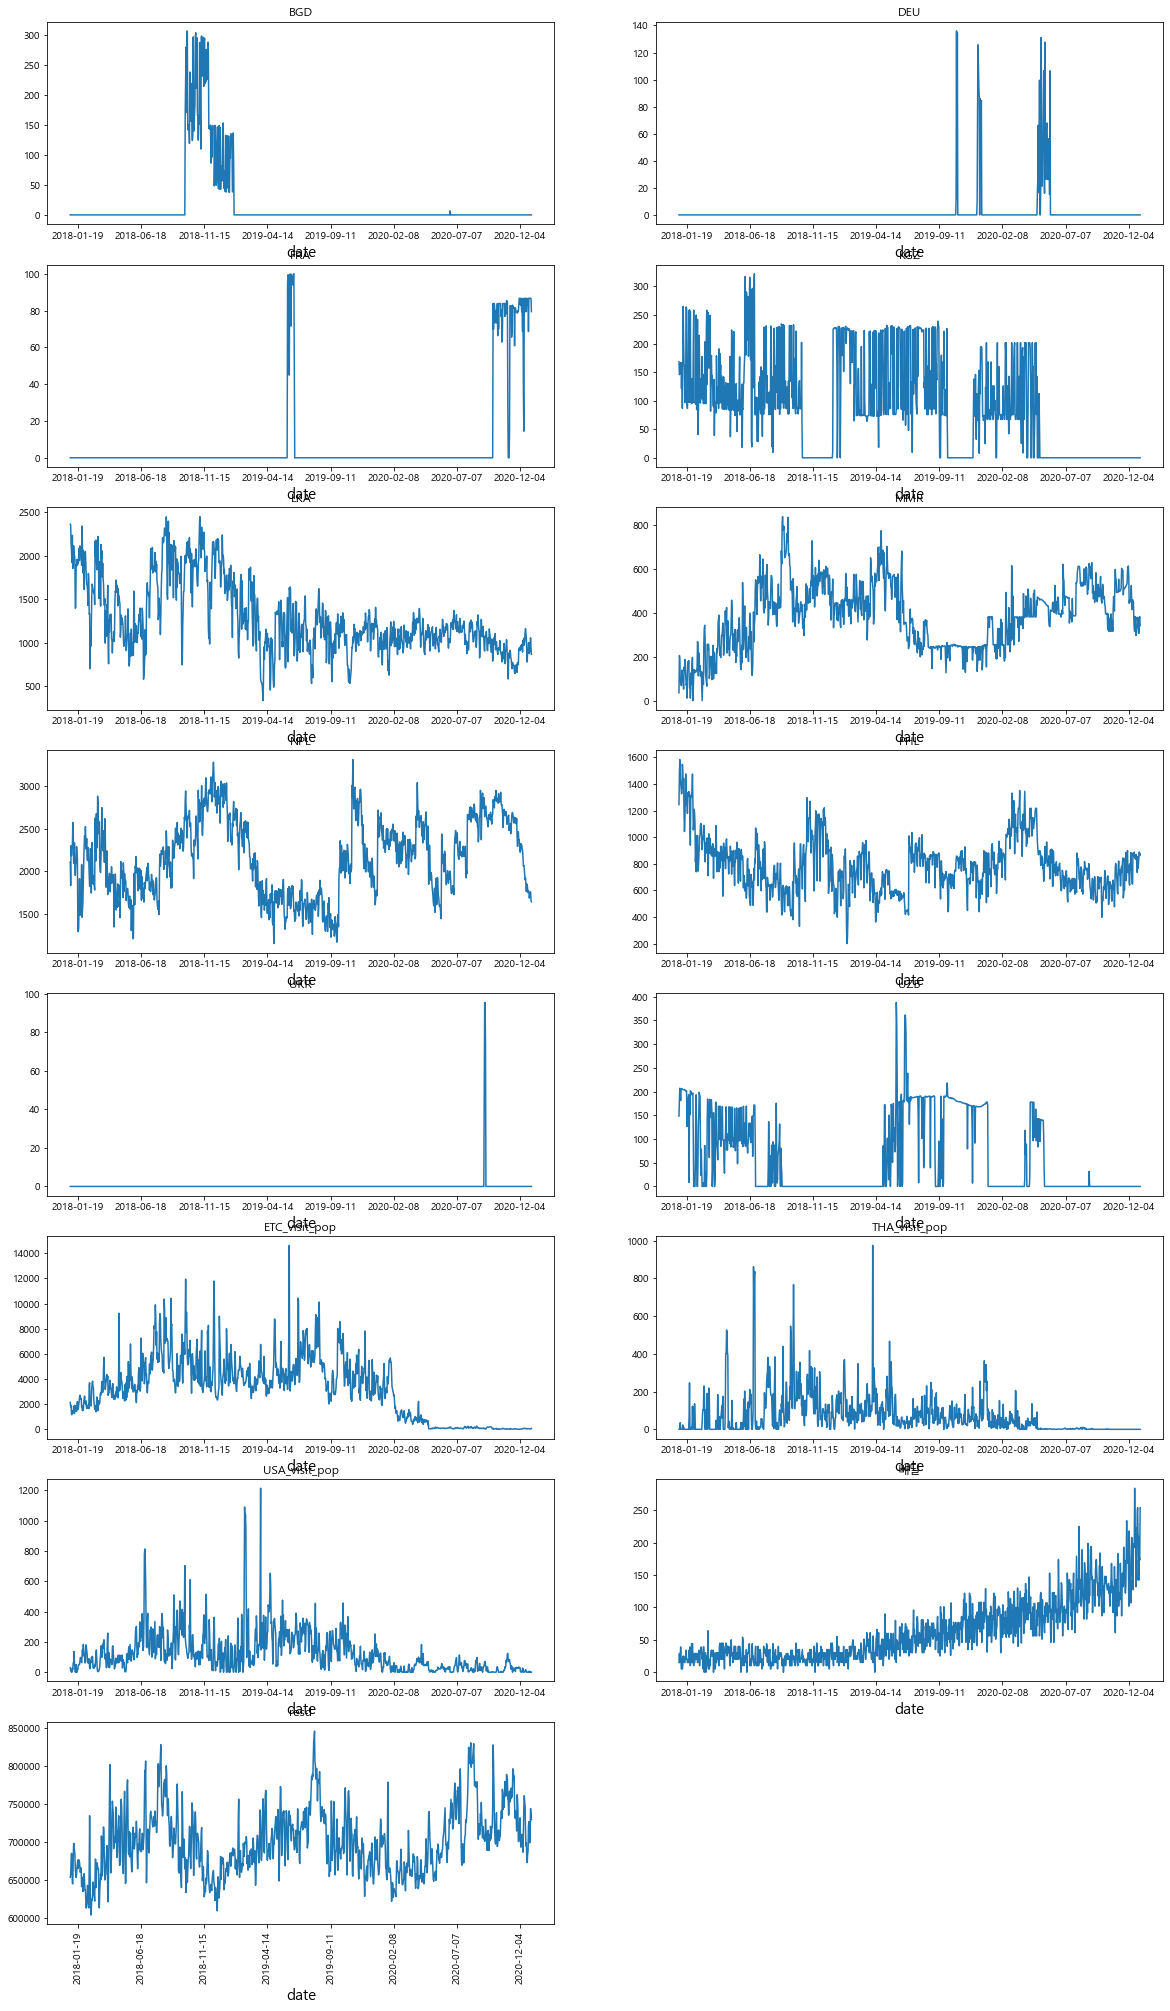

In [71]:
fig = plt.figure(figsize=(20,35))

ax1 = fig.add_subplot(8, 2, 1)
ax1.plot(한림읍_train['base_date'],한림읍_train['BGD_cnt'])
ax1.set_xlabel('date', fontsize = 15)
ax1.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('BGD')

ax2 = fig.add_subplot(8, 2, 2)
ax2.plot(한림읍_train['base_date'],한림읍_train['DEU_cnt'])
ax2.set_xlabel('date', fontsize = 15)
ax2.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('DEU')

ax3 = fig.add_subplot(8, 2, 3)
ax3.plot(한림읍_train['base_date'],한림읍_train['FRA_cnt'])
ax3.set_xlabel('date', fontsize = 15)
ax3.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('FRA')

ax4 = fig.add_subplot(8, 2, 4)
ax4.plot(한림읍_train['base_date'],한림읍_train['KGZ_cnt'])
ax4.set_xlabel('date', fontsize = 15)
ax4.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('KGZ')

ax5 = fig.add_subplot(8, 2, 5)
ax5.plot(한림읍_train['base_date'],한림읍_train['LKA_cnt'])
ax5.set_xlabel('date', fontsize = 15)
ax5.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('LKA')

ax6 = fig.add_subplot(8, 2, 6)
ax6.plot(한림읍_train['base_date'],한림읍_train['MMR_cnt'])
ax6.set_xlabel('date', fontsize = 15)
ax6.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('MMR')

ax7 = fig.add_subplot(8, 2, 7)
ax7.plot(한림읍_train['base_date'],한림읍_train['NPL_cnt'])
ax7.set_xlabel('date', fontsize = 15)
ax7.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('NPL')

ax8 = fig.add_subplot(8, 2, 8)
ax8.plot(한림읍_train['base_date'],한림읍_train['PHL_cnt'])
ax8.set_xlabel('date', fontsize = 15)
ax8.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('PHL')

ax9 = fig.add_subplot(8, 2, 9)
ax9.plot(한림읍_train['base_date'],한림읍_train['UKR_cnt'])
ax9.set_xlabel('date', fontsize = 15)
ax9.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('UKR')

ax10 = fig.add_subplot(8, 2, 10)
ax10.plot(한림읍_train['base_date'],한림읍_train['UZB_cnt'])
ax10.set_xlabel('date', fontsize = 15)
ax10.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('UZB')

ax11 = fig.add_subplot(8, 2, 11)
ax11.plot(한림읍_train['base_date'],한림읍_train['ETC_visit_pop_cnt'])
ax11.set_xlabel('date', fontsize = 15)
ax11.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('ETC_visit_pop')

ax12 = fig.add_subplot(8, 2, 12)
ax12.plot(한림읍_train['base_date'],한림읍_train['THA_visit_pop_cnt'])
ax12.set_xlabel('date', fontsize = 15)
ax12.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('THA_visit_pop')

ax13 = fig.add_subplot(8, 2, 13)
ax13.plot(한림읍_train['base_date'],한림읍_train['USA_visit_pop_cnt'])
ax13.set_xlabel('date', fontsize = 15)
ax13.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('USA_visit_pop')

ax14 = fig.add_subplot(8, 2, 14)
ax14.plot(한림읍_train['base_date'],한림읍_train['배달_cnt'])
ax14.set_xlabel('date', fontsize = 15)
ax14.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('배달')

ax15 = fig.add_subplot(8, 2, 15)
ax15.plot(한림읍_train['base_date'],한림읍_train['resd'])
ax15.set_xlabel('date', fontsize = 15)
ax15.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('resd')

plt.xticks(rotation='vertical')
plt.show()

In [73]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc_한림읍 = MinMaxScaler(feature_range = (0, 1))
train_한림읍_inf_scaled = sc_한림읍.fit_transform(train_한림읍_inf)

In [75]:
# Creating a data structure with 60 timesteps and 15 output
X_train = []
y_train = []
for i in range(60, 1096):
    X_train.append(train_한림읍_inf_scaled[i-60:i, :])
    y_train.append(train_한림읍_inf_scaled[i, :])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape

(1036, 60, 15)

In [76]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [79]:
Model = Sequential()
Model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 15)))
Model.add(Dropout(0.2))
Model.add(LSTM(units = 200, return_sequences = True))
Model.add(Dropout(0.2))
Model.add(LSTM(units = 250, return_sequences = True))
Model.add(Dropout(0.2))
Model.add(LSTM(units = 100))
Model.add(Dropout(0.2))
Model.add(Dense(units = 15))

In [80]:
Model.compile(optimizer = 'adam', loss = 'mean_squared_error')

Model.fit(X_train, y_train, epochs = 200, batch_size = 20)

Epoch 1/200
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpnqwqha29.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (tmpnqwqha29.py, line 48)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
52/52 [==============================] - 22s 112ms/step - loss: 0.0417
Epoch 2/200
52/52 [==============================] - 6s 108ms/step - loss: 0.0187
Epoch 3/200
52/52 [==============================] - 6s 107ms/step - loss: 0.0164
Epoch 4/200
52/52 [==============================] - 5s 105ms/step - loss: 0.0151
Epoch 5/200
52/52 [==============================] - 6s 114ms/step 

52/52 [==============================] - 6s 110ms/step - loss: 0.0060
Epoch 89/200
52/52 [==============================] - 6s 114ms/step - loss: 0.0062
Epoch 90/200
52/52 [==============================] - 5s 105ms/step - loss: 0.0059
Epoch 91/200
52/52 [==============================] - 5s 105ms/step - loss: 0.0056
Epoch 92/200
52/52 [==============================] - 5s 106ms/step - loss: 0.0055
Epoch 93/200
52/52 [==============================] - 5s 103ms/step - loss: 0.0055
Epoch 94/200
52/52 [==============================] - 5s 99ms/step - loss: 0.0055
Epoch 95/200
52/52 [==============================] - 5s 104ms/step - loss: 0.0052
Epoch 96/200
52/52 [==============================] - 5s 102ms/step - loss: 0.0057 0s - lo
Epoch 97/200
52/52 [==============================] - 5s 98ms/step - loss: 0.0058
Epoch 98/200
52/52 [==============================] - 5s 99ms/step - loss: 0.0054
Epoch 99/200
52/52 [==============================] - 5s 104ms/step - loss: 0.0054
Epoch 100/20

52/52 [==============================] - 5s 105ms/step - loss: 0.0039
Epoch 186/200
52/52 [==============================] - 5s 101ms/step - loss: 0.0039
Epoch 187/200
52/52 [==============================] - 5s 98ms/step - loss: 0.0037
Epoch 188/200
52/52 [==============================] - 5s 99ms/step - loss: 0.0035
Epoch 189/200
52/52 [==============================] - 5s 99ms/step - loss: 0.0036
Epoch 190/200
52/52 [==============================] - 5s 99ms/step - loss: 0.0037
Epoch 191/200
52/52 [==============================] - 5s 99ms/step - loss: 0.0035
Epoch 192/200
52/52 [==============================] - 5s 100ms/step - loss: 0.0034
Epoch 193/200
52/52 [==============================] - 5s 99ms/step - loss: 0.0036
Epoch 194/200
52/52 [==============================] - 5s 99ms/step - loss: 0.0034
Epoch 195/200
52/52 [==============================] - 5s 99ms/step - loss: 0.0035
Epoch 196/200
52/52 [==============================] - 5s 101ms/step - loss: 0.0033
Epoch 197/200


In [84]:
# Getting the predicted value
한림읍_total = pd.concat((한림읍_train, 한림읍_test), axis = 0).drop(['base_date', 'emd_nm'], axis=1)
inputs = 한림읍_total[len(한림읍_total) - len(한림읍_test) - 60:].values
inputs = sc_한림읍.transform(inputs)
X_test = []
for i in range(60, 241):
    X_test.append(inputs[i-60:i, :])
X_test = np.array(X_test)
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 10))
pred_inf = Model.predict(X_test)
pred_inf = sc_한림읍.inverse_transform(pred_inf)
X_test.shape

(181, 60, 15)

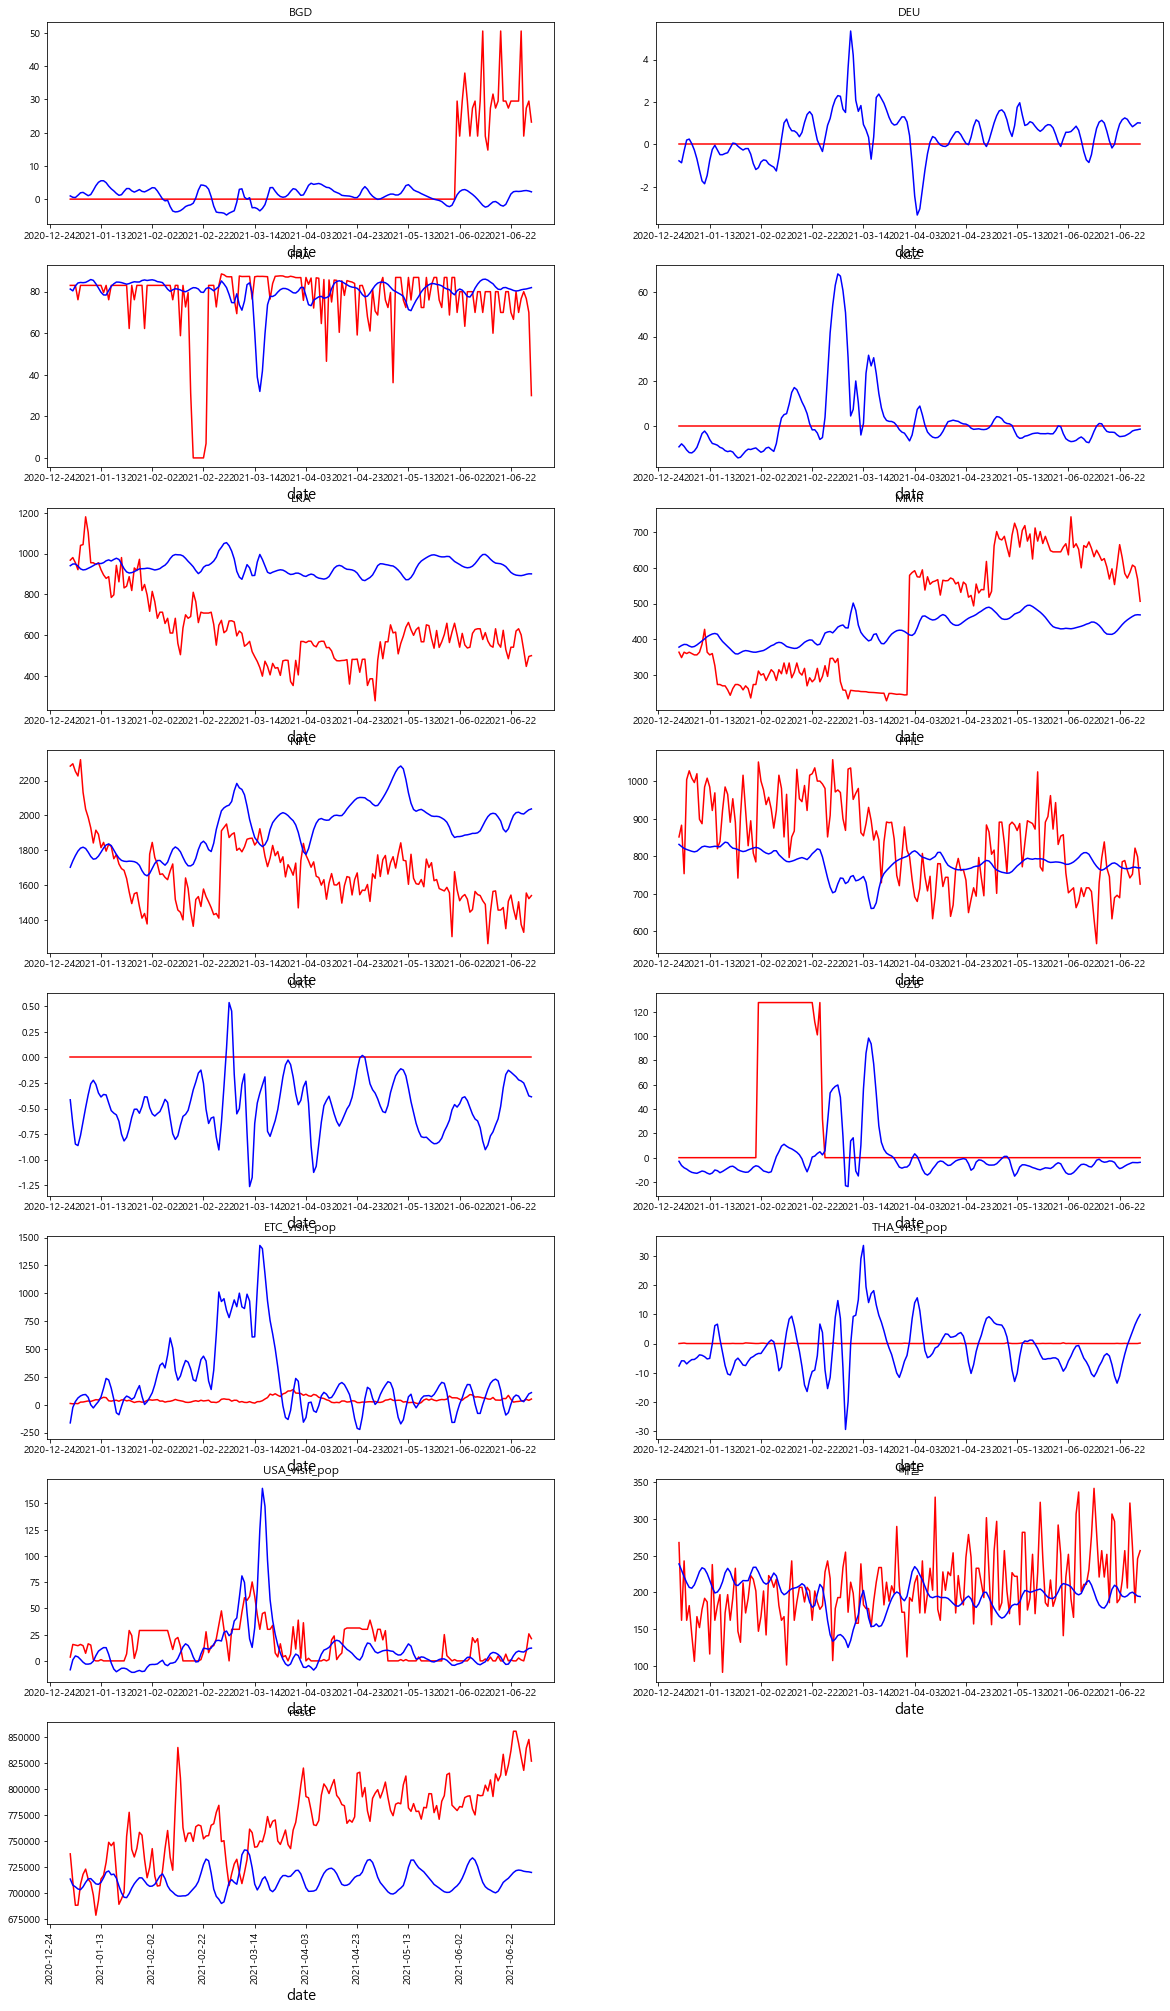

In [86]:
fig2 = plt.figure(figsize=(20,35))

bx1 = fig2.add_subplot(8, 2, 1)
bx1.plot(한림읍_test['base_date'], 한림읍_test['BGD_cnt'], color = 'red', label = 'Real')
bx1.plot(한림읍_test['base_date'], pred_inf[:,0], color = 'blue', label = 'Predicted by Model 1')
bx1.set_xlabel('date', fontsize = 15)
bx1.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('BGD')

bx2 = fig2.add_subplot(8, 2, 2)
bx2.plot(한림읍_test['base_date'], 한림읍_test['DEU_cnt'], color = 'red', label = 'Real')
bx2.plot(한림읍_test['base_date'], pred_inf[:,1], color = 'blue', label = 'Predicted by Model 1')
bx2.set_xlabel('date', fontsize = 15)
bx2.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('DEU')

bx3 = fig2.add_subplot(8, 2, 3)
bx3.plot(한림읍_test['base_date'], 한림읍_test['FRA_cnt'], color = 'red', label = 'Real')
bx3.plot(한림읍_test['base_date'], pred_inf[:,2], color = 'blue', label = 'Predicted by Model 1')
bx3.set_xlabel('date', fontsize = 15)
bx3.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('FRA')

bx4 = fig2.add_subplot(8, 2, 4)
bx4.plot(한림읍_test['base_date'], 한림읍_test['KGZ_cnt'], color = 'red', label = 'Real')
bx4.plot(한림읍_test['base_date'], pred_inf[:,3], color = 'blue', label = 'Predicted by Model 1')
bx4.set_xlabel('date', fontsize = 15)
bx4.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('KGZ')

bx5 = fig2.add_subplot(8, 2, 5)
bx5.plot(한림읍_test['base_date'], 한림읍_test['LKA_cnt'], color = 'red', label = 'Real')
bx5.plot(한림읍_test['base_date'], pred_inf[:,4], color = 'blue', label = 'Predicted by Model 1')
bx5.set_xlabel('date', fontsize = 15)
bx5.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('LKA')

bx6 = fig2.add_subplot(8, 2, 6)
bx6.plot(한림읍_test['base_date'], 한림읍_test['MMR_cnt'], color = 'red', label = 'Real')
bx6.plot(한림읍_test['base_date'], pred_inf[:,5], color = 'blue', label = 'Predicted by Model 1')
bx6.set_xlabel('date', fontsize = 15)
bx6.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('MMR')

bx7 = fig2.add_subplot(8, 2, 7)
bx7.plot(한림읍_test['base_date'], 한림읍_test['NPL_cnt'], color = 'red', label = 'Real')
bx7.plot(한림읍_test['base_date'], pred_inf[:,6], color = 'blue', label = 'Predicted by Model 1')
bx7.set_xlabel('date', fontsize = 15)
bx7.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('NPL')

bx8 = fig2.add_subplot(8, 2, 8)
bx8.plot(한림읍_test['base_date'], 한림읍_test['PHL_cnt'], color = 'red', label = 'Real')
bx8.plot(한림읍_test['base_date'], pred_inf[:,7], color = 'blue', label = 'Predicted by Model 1')
bx8.set_xlabel('date', fontsize = 15)
bx8.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('PHL')

bx9 = fig2.add_subplot(8, 2, 9)
bx9.plot(한림읍_test['base_date'], 한림읍_test['UKR_cnt'], color = 'red', label = 'Real')
bx9.plot(한림읍_test['base_date'], pred_inf[:,8], color = 'blue', label = 'Predicted by Model 1')
bx9.set_xlabel('date', fontsize = 15)
bx9.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('UKR')

bx10 = fig2.add_subplot(8, 2, 10)
bx10.plot(한림읍_test['base_date'], 한림읍_test['UZB_cnt'], color = 'red', label = 'Real')
bx10.plot(한림읍_test['base_date'], pred_inf[:,9], color = 'blue', label = 'Predicted by Model 1')
bx10.set_xlabel('date', fontsize = 15)
bx10.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('UZB')

bx11 = fig2.add_subplot(8, 2, 11)
bx11.plot(한림읍_test['base_date'], 한림읍_test['ETC_visit_pop_cnt'], color = 'red', label = 'Real')
bx11.plot(한림읍_test['base_date'], pred_inf[:,10], color = 'blue', label = 'Predicted by Model 1')
bx11.set_xlabel('date', fontsize = 15)
bx11.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('ETC_visit_pop')

bx12 = fig2.add_subplot(8, 2, 12)
bx12.plot(한림읍_test['base_date'], 한림읍_test['THA_visit_pop_cnt'], color = 'red', label = 'Real')
bx12.plot(한림읍_test['base_date'], pred_inf[:,11], color = 'blue', label = 'Predicted by Model 1')
bx12.set_xlabel('date', fontsize = 15)
bx12.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('THA_visit_pop')

bx13 = fig2.add_subplot(8, 2, 13)
bx13.plot(한림읍_test['base_date'], 한림읍_test['USA_visit_pop_cnt'], color = 'red', label = 'Real')
bx13.plot(한림읍_test['base_date'], pred_inf[:,12], color = 'blue', label = 'Predicted by Model 1')
bx13.set_xlabel('date', fontsize = 15)
bx13.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('USA_visit_pop')

bx14 = fig2.add_subplot(8, 2, 14)
bx14.plot(한림읍_test['base_date'], 한림읍_test['배달_cnt'], color = 'red', label = 'Real')
bx14.plot(한림읍_test['base_date'], pred_inf[:,13], color = 'blue', label = 'Predicted by Model 1')
bx14.set_xlabel('date', fontsize = 15)
bx14.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('배달')

bx15 = fig2.add_subplot(8, 2, 15)
bx15.plot(한림읍_test['base_date'], 한림읍_test['resd'], color = 'red', label = 'Real')
bx15.plot(한림읍_test['base_date'], pred_inf[:,14], color = 'blue', label = 'Predicted by Model 1')
bx15.set_xlabel('date', fontsize = 15)
bx15.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('resd')

plt.xticks(rotation='vertical')
plt.show()

In [142]:
# Getting the predicted value
inputs = 한림읍_total[len(한림읍_total) - 60:].values
inputs = sc_한림읍.transform(inputs)
Y_predict = []
for i in range(0, 62):
    X_predict = []
    X_predict.append(inputs[i:60+i, :])
    X_predict = np.array(X_predict)
    pred = Model.predict(X_predict)
    inputs = np.concatenate([inputs, pred]) # 61, 15
    pred = sc_한림읍.inverse_transform(pred)
    Y_predict.append(pred)

In [156]:
Y_predict = pd.DataFrame(Y_predict)
Y_predict

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,2.080939,0.930248,82.072990,-1.999885,895.799927,468.358002,2040.599121,775.128967,-0.296655,-2.829314,74.585564,10.792459,11.945455,194.634293,719194.5625
1,2.036204,0.926366,82.031944,-2.043536,894.209045,469.876007,2053.660645,775.993469,-0.279917,-2.498343,65.326180,11.650537,13.023347,192.972702,719355.8750
2,1.935490,0.920299,81.969528,-2.074647,892.401855,471.187256,2066.603760,773.635254,-0.264034,-2.504449,61.221775,12.150173,13.435100,192.202179,719967.2500
3,1.869873,0.906773,81.842720,-1.849152,888.290771,475.123749,2087.374756,770.857483,-0.228092,-2.299152,52.416279,12.568056,13.529614,192.121643,720588.8750
4,1.990076,0.844121,81.660858,-1.261747,882.923950,483.005676,2115.323730,769.420532,-0.203647,-1.755263,38.053581,13.032804,13.811865,192.363007,720784.3750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1.309799,-0.634542,85.224998,-9.493101,942.321411,380.078705,1736.539551,825.064575,-0.412024,-8.183233,99.758987,-5.146008,-6.201125,221.150375,715740.8750
58,0.931885,-0.719002,85.342697,-10.058124,947.416016,380.298859,1742.450684,826.611389,-0.415490,-8.459061,71.465027,-5.068011,-6.941906,222.921997,714154.4375
59,0.639008,-0.821532,85.456482,-10.402232,950.552002,379.682678,1743.315796,828.019409,-0.414332,-8.609642,49.109123,-4.875695,-7.291295,224.855408,712517.0000
60,0.416065,-0.929665,85.460052,-10.545101,950.148987,377.930573,1743.150146,827.120239,-0.432672,-8.664011,57.482311,-4.510844,-6.937847,224.761093,710018.0625


In [162]:
Y_predict.rename(columns = {Y_predict.columns[0]:"BGD_cnt", Y_predict.columns[1]:"DEU_cnt", Y_predict.columns[2]:"FRA_cnt", 
                            Y_predict.columns[3]:"KGZ_cnt", Y_predict.columns[4]:"LKA_cnt", Y_predict.columns[5]:"MMR_cnt", 
                            Y_predict.columns[6]:"NPL_cnt", Y_predict.columns[7]:"PHL_cnt", Y_predict.columns[8]:"UKR_cnt", 
                            Y_predict.columns[9]:"UZB_cnt", Y_predict.columns[10]:"ETC_visit_pop_cnt", 
                            Y_predict.columns[11]:"THA_visit_pop_cnt", Y_predict.columns[12]:"USA_visit_pop_cnt", 
                            Y_predict.columns[13]:"배달_cnt", Y_predict.columns[14]:"resd"}, inplace=True)

In [163]:
한림읍_predict = pd.read_csv("한림읍_predict.csv", encoding='cp949')

In [164]:
한림읍_predict

,base_date,emd_nm
0,2021-07-01,한림읍
1,2021-07-02,한림읍
2,2021-07-03,한림읍
3,2021-07-04,한림읍
4,2021-07-05,한림읍
...,...,...
57,2021-08-27,한림읍
58,2021-08-28,한림읍
59,2021-08-29,한림읍
60,2021-08-30,한림읍


In [165]:
한림읍_predict = pd.concat((한림읍_predict, Y_predict), axis = 1)

In [166]:
한림읍_predict

,base_date,emd_nm,BGD_cnt,DEU_cnt,FRA_cnt,KGZ_cnt,LKA_cnt,MMR_cnt,NPL_cnt,PHL_cnt,UKR_cnt,UZB_cnt,ETC_visit_pop_cnt,THA_visit_pop_cnt,USA_visit_pop_cnt,배달_cnt,resd
0,2021-07-01,한림읍,2.080939,0.930248,82.072990,-1.999885,895.799927,468.358002,2040.599121,775.128967,-0.296655,-2.829314,74.585564,10.792459,11.945455,194.634293,719194.5625
1,2021-07-02,한림읍,2.036204,0.926366,82.031944,-2.043536,894.209045,469.876007,2053.660645,775.993469,-0.279917,-2.498343,65.326180,11.650537,13.023347,192.972702,719355.8750
2,2021-07-03,한림읍,1.935490,0.920299,81.969528,-2.074647,892.401855,471.187256,2066.603760,773.635254,-0.264034,-2.504449,61.221775,12.150173,13.435100,192.202179,719967.2500
3,2021-07-04,한림읍,1.869873,0.906773,81.842720,-1.849152,888.290771,475.123749,2087.374756,770.857483,-0.228092,-2.299152,52.416279,12.568056,13.529614,192.121643,720588.8750
4,2021-07-05,한림읍,1.990076,0.844121,81.660858,-1.261747,882.923950,483.005676,2115.323730,769.420532,-0.203647,-1.755263,38.053581,13.032804,13.811865,192.363007,720784.3750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2021-08-27,한림읍,1.309799,-0.634542,85.224998,-9.493101,942.321411,380.078705,1736.539551,825.064575,-0.412024,-8.183233,99.758987,-5.146008,-6.201125,221.150375,715740.8750
58,2021-08-28,한림읍,0.931885,-0.719002,85.342697,-10.058124,947.416016,380.298859,1742.450684,826.611389,-0.415490,-8.459061,71.465027,-5.068011,-6.941906,222.921997,714154.4375
59,2021-08-29,한림읍,0.639008,-0.821532,85.456482,-10.402232,950.552002,379.682678,1743.315796,828.019409,-0.414332,-8.609642,49.109123,-4.875695,-7.291295,224.855408,712517.0000
60,2021-08-30,한림읍,0.416065,-0.929665,85.460052,-10.545101,950.148987,377.930573,1743.150146,827.120239,-0.432672,-8.664011,57.482311,-4.510844,-6.937847,224.761093,710018.0625


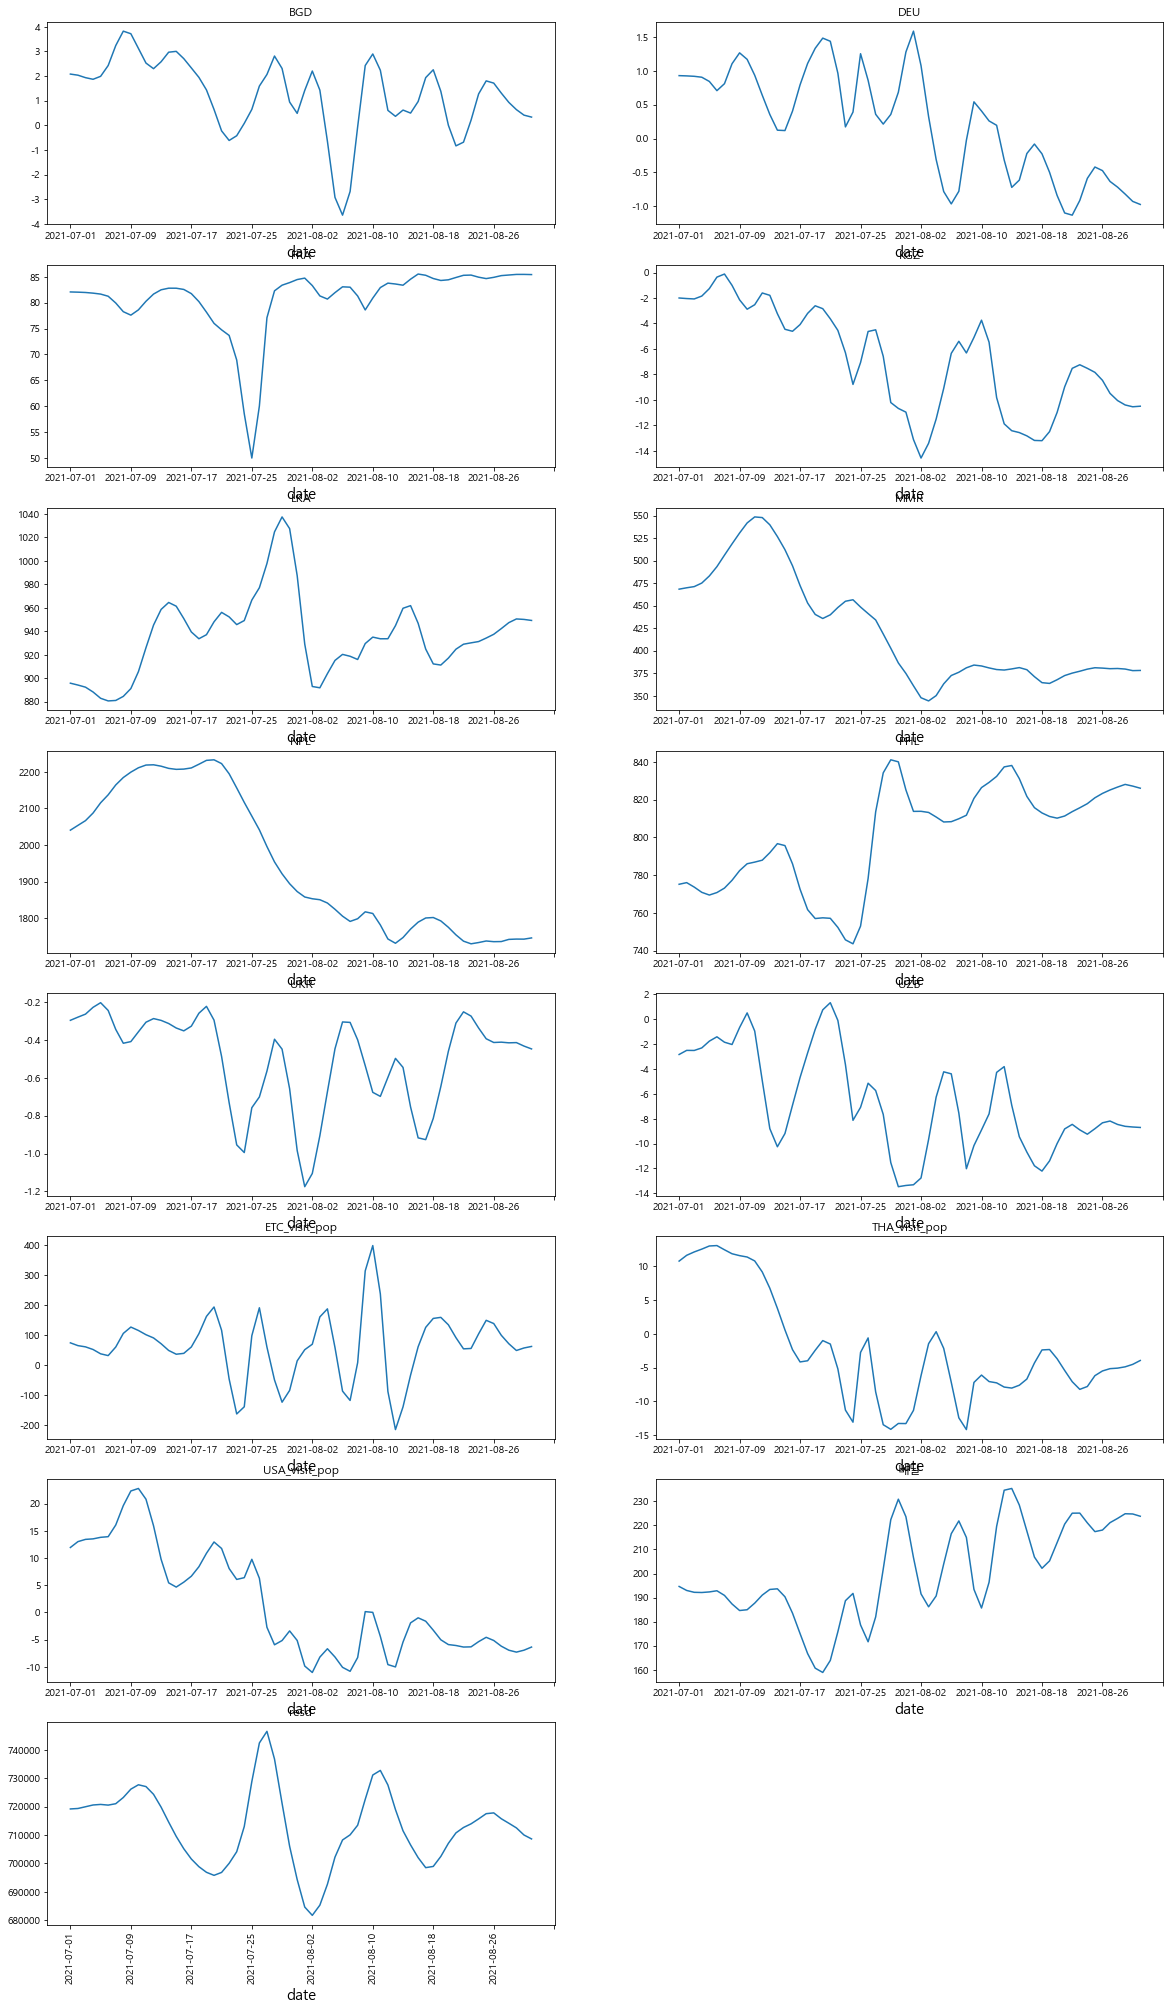

In [170]:
fig3 = plt.figure(figsize=(20,35))

cx1 = fig3.add_subplot(8, 2, 1)
cx1.plot(한림읍_predict['base_date'],한림읍_predict['BGD_cnt'])
cx1.set_xlabel('date', fontsize = 15)
cx1.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('BGD')

cx2 = fig3.add_subplot(8, 2, 2)
cx2.plot(한림읍_predict['base_date'],한림읍_predict['DEU_cnt'])
cx2.set_xlabel('date', fontsize = 15)
cx2.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('DEU')

cx3 = fig3.add_subplot(8, 2, 3)
cx3.plot(한림읍_predict['base_date'],한림읍_predict['FRA_cnt'])
cx3.set_xlabel('date', fontsize = 15)
cx3.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('FRA')

cx4 = fig3.add_subplot(8, 2, 4)
cx4.plot(한림읍_predict['base_date'],한림읍_predict['KGZ_cnt'])
cx4.set_xlabel('date', fontsize = 15)
cx4.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('KGZ')

cx5 = fig3.add_subplot(8, 2, 5)
cx5.plot(한림읍_predict['base_date'],한림읍_predict['LKA_cnt'])
cx5.set_xlabel('date', fontsize = 15)
cx5.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('LKA')

cx6 = fig3.add_subplot(8, 2, 6)
cx6.plot(한림읍_predict['base_date'],한림읍_predict['MMR_cnt'])
cx6.set_xlabel('date', fontsize = 15)
cx6.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('MMR')

cx7 = fig3.add_subplot(8, 2, 7)
cx7.plot(한림읍_predict['base_date'],한림읍_predict['NPL_cnt'])
cx7.set_xlabel('date', fontsize = 15)
cx7.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('NPL')

cx8 = fig3.add_subplot(8, 2, 8)
cx8.plot(한림읍_predict['base_date'],한림읍_predict['PHL_cnt'])
cx8.set_xlabel('date', fontsize = 15)
cx8.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('PHL')

cx9 = fig3.add_subplot(8, 2, 9)
cx9.plot(한림읍_predict['base_date'],한림읍_predict['UKR_cnt'])
cx9.set_xlabel('date', fontsize = 15)
cx9.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('UKR')

cx10 = fig3.add_subplot(8, 2, 10)
cx10.plot(한림읍_predict['base_date'],한림읍_predict['UZB_cnt'])
cx10.set_xlabel('date', fontsize = 15)
cx10.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('UZB')

cx11 = fig3.add_subplot(8, 2, 11)
cx11.plot(한림읍_predict['base_date'],한림읍_predict['ETC_visit_pop_cnt'])
cx11.set_xlabel('date', fontsize = 15)
cx11.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('ETC_visit_pop')

cx12 = fig3.add_subplot(8, 2, 12)
cx12.plot(한림읍_predict['base_date'],한림읍_predict['THA_visit_pop_cnt'])
cx12.set_xlabel('date', fontsize = 15)
cx12.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('THA_visit_pop')

cx13 = fig3.add_subplot(8, 2, 13)
cx13.plot(한림읍_predict['base_date'],한림읍_predict['USA_visit_pop_cnt'])
cx13.set_xlabel('date', fontsize = 15)
cx13.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('USA_visit_pop')

cx14 = fig3.add_subplot(8, 2, 14)
cx14.plot(한림읍_predict['base_date'],한림읍_predict['배달_cnt'])
cx14.set_xlabel('date', fontsize = 15)
cx14.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('배달')

cx15 = fig3.add_subplot(8, 2, 15)
cx15.plot(한림읍_predict['base_date'],한림읍_predict['resd'])
cx15.set_xlabel('date', fontsize = 15)
cx15.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('resd')

plt.xticks(rotation='vertical')
plt.show()